<a href="https://colab.research.google.com/github/AKAALBRAMHA/Comprehensive-Supply-Chain-Analysis/blob/main/Supplier_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplier Performance Analysis
---

### Goal: Analyze and visualize supplier performance based on Key Performance Indicators (KPIs).

### Key KPIs:

  - Lead Time: Average time taken by each supplier to deliver products.
  - Defect Rates: Percentage of defective products delivered by each supplier.
  - Production Volumes: Total quantity of products supplied.
  - Costs: Total and average costs incurred for each supplier.
  - Inspection Results: Pass/Fail rate of inspections for each supplier.

### Steps:

  - Data Aggregation: Aggregate data by Supplier Name to calculate the average lead time, defect rates, total production volumes, and costs.
  - Visualization:
      - Use bar charts to compare suppliers based on each KPI.
      - Line charts can show trends in lead time and defect rates over time.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('/content/supply_chain_data.csv')

In [64]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [65]:
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [79]:
print(f"Number of rows are : {df.shape[0]}")
print(f"Number of columns are : {df.shape[1]}")

Number of rows are : 100
Number of columns are : 24


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [81]:
df.duplicated().sum()

0

In [82]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

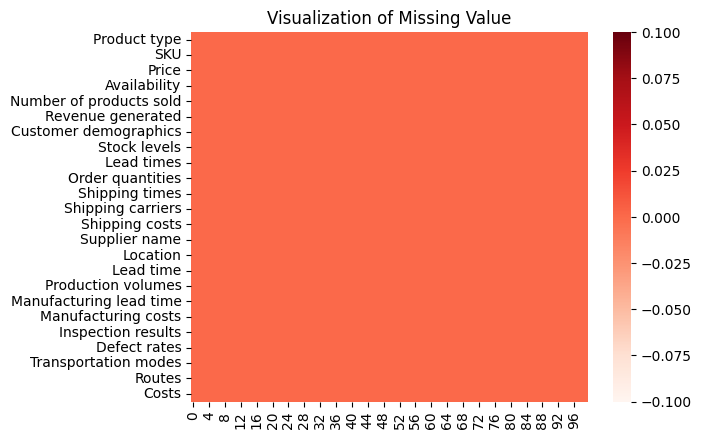

<Figure size 1000x800 with 0 Axes>

In [70]:
sns.heatmap(df.isna().transpose(), cmap = 'Reds')
plt.title('Visualization of Missing Value')
plt.figure(figsize=(10, 8))
plt.show()

In [71]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [72]:
supplier_performance = df.groupby('Supplier name').agg({
    'Lead time': 'mean',
    'Defect rates': 'mean',
    'Production volumes': 'sum',
    'Costs': 'sum',
    'Inspection results': lambda x: (x == 'Pass').mean()
}).reset_index()

<ipython-input-73-c52d2fe941f0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_performance, x='Supplier name', y='Lead time', palette="tab10")


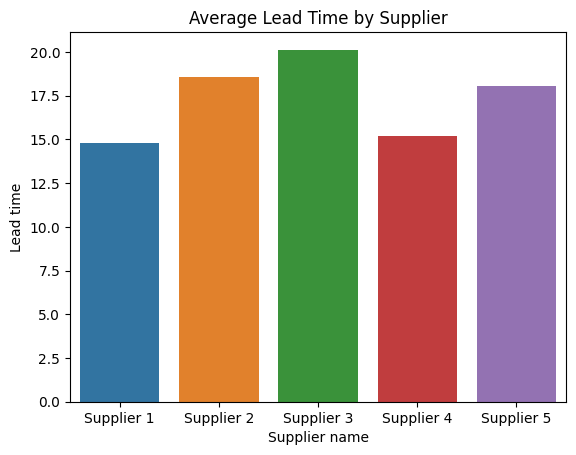

<Figure size 1000x800 with 0 Axes>

In [73]:
sns.barplot(data=supplier_performance, x='Supplier name', y='Lead time', palette="tab10")
plt.title('Average Lead Time by Supplier')
plt.figure(figsize=(10, 8))
plt.show()

<ipython-input-74-9eb5d064dc76>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_performance, x='Supplier name', y='Defect rates', palette="tab10")


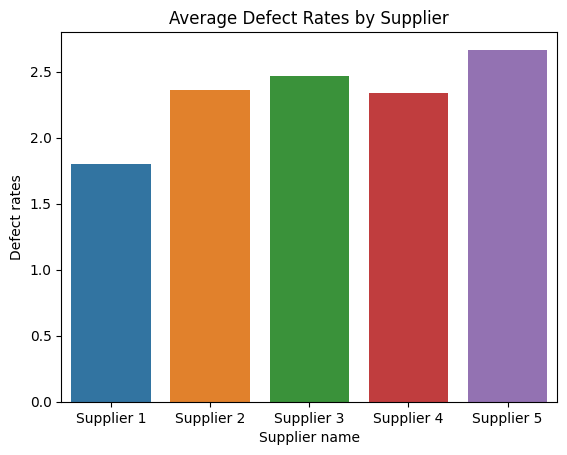

<Figure size 1000x800 with 0 Axes>

In [74]:
sns.barplot(data=supplier_performance, x='Supplier name', y='Defect rates', palette="tab10")
plt.title('Average Defect Rates by Supplier')
plt.figure(figsize=(10, 8))
plt.show()

<ipython-input-75-13cd68eccbff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_performance, x='Supplier name', y='Production volumes', palette="tab10")


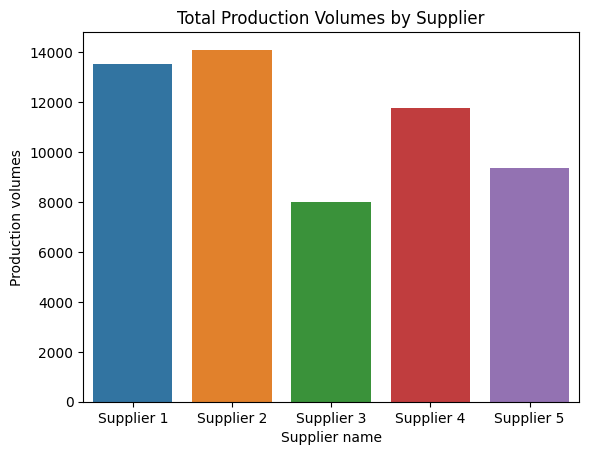

<Figure size 1000x800 with 0 Axes>

In [75]:
sns.barplot(data=supplier_performance, x='Supplier name', y='Production volumes', palette="tab10")
plt.title('Total Production Volumes by Supplier')
plt.figure(figsize=(10, 8))
plt.show()

<ipython-input-76-909f8a13da85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_performance, x='Supplier name', y='Costs', palette="tab10")


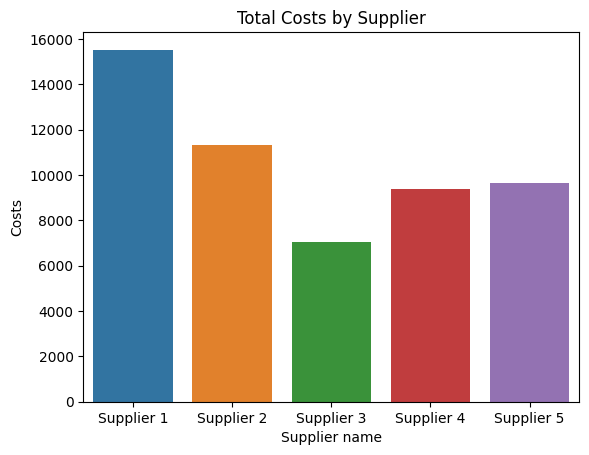

<Figure size 1000x800 with 0 Axes>

In [76]:
sns.barplot(data=supplier_performance, x='Supplier name', y='Costs', palette="tab10")
plt.title('Total Costs by Supplier')
plt.figure(figsize=(10, 8))
plt.show()

<ipython-input-83-6a24b58d0000>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_performance, x='Supplier name', y='Inspection results', palette="tab10")


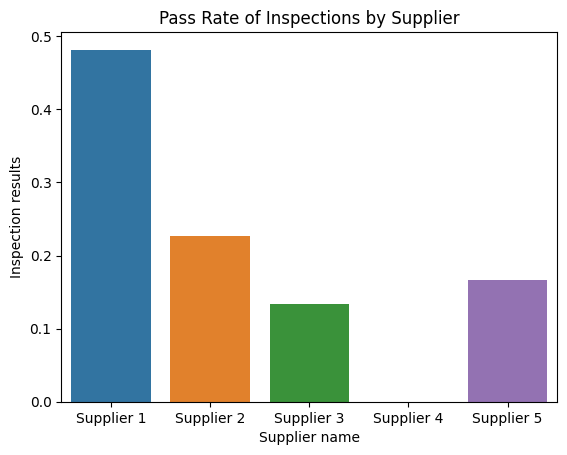

<Figure size 1000x800 with 0 Axes>

In [83]:
sns.barplot(data=supplier_performance, x='Supplier name', y='Inspection results', palette="tab10")
plt.title('Pass Rate of Inspections by Supplier')
plt.figure(figsize=(10, 8))
plt.show()